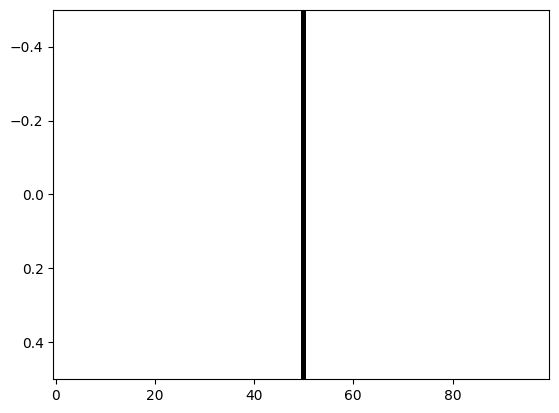

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rule30(state):
    new_state = np.zeros_like(state)
    for i in range(1, len(state) - 1):
        left, center, right = state[i-1:i+2]
        if (left, center, right) in [(1,1,1), (1,1,0), (1,0,1), (0,1,1), (0,0,0)]:
            new_state[i] = 0
        else:
            new_state[i] = 1
    return new_state

def cellular_automaton(rule, initial_state, num_generations):
    state = initial_state
    for _ in range(num_generations):
        yield state
        state = rule(state)

# Set the initial state and number of generations
initial_state = np.zeros(100, dtype=int)
initial_state[50] = 1
num_generations = 100

# Create a figure and axis for plotting
fig, ax = plt.subplots()
ax.set_axis_off()

# Create an empty list to store the states
states = []

# Run the cellular automaton and store the states
for state in cellular_automaton(rule30, initial_state, num_generations):
    states.append(state)

# Update the plot in real-time
for i in range(num_generations):
    ax.clear()
    ax.imshow(np.array(states[:i+1]), cmap='binary', aspect='auto', vmin=0, vmax=1)
    plt.pause(0.1)  # Adjust the pause duration to control the speed of the animation

plt.show()

In [2]:
def visualize_reserves(reserves):
    scale = 0.1
    bar_length = int(reserves * scale)
    bar = '█' * bar_length
    print(f"Reserves: {reserves} {bar}")

def visualize_loans(loans):
    scale = 0.1
    bar_length = int(loans * scale)
    bar = '█' * bar_length
    print(f"Loans:    {loans} {bar}")

def simulate_fractional_reserve_banking(initial_deposit, reserve_ratio, iterations):
    reserves = initial_deposit
    loans = 0
    money_supply = initial_deposit

    print(f"Initial Deposit: {initial_deposit}")
    print(f"Reserve Ratio: {reserve_ratio}")
    print(f"Iterations: {iterations}")
    print()

    for i in range(iterations):
        max_loanable = reserves - (reserves * reserve_ratio)
        new_loans = max_loanable
        reserves -= new_loans
        loans += new_loans
        money_supply += new_loans

        print(f"Iteration {i+1}:")
        visualize_reserves(reserves)
        visualize_loans(loans)
        print()

    print(f"Total Money Supply: {money_supply}")

# Example usage
initial_deposit = 1000
reserve_ratio = 0.1
iterations = 5

simulate_fractional_reserve_banking(initial_deposit, reserve_ratio, iterations)

Initial Deposit: 1000
Reserve Ratio: 0.1
Iterations: 5

Iteration 1:
Reserves: 100.0 ██████████
Loans:    900.0 ██████████████████████████████████████████████████████████████████████████████████████████

Iteration 2:
Reserves: 10.0 █
Loans:    990.0 ███████████████████████████████████████████████████████████████████████████████████████████████████

Iteration 3:
Reserves: 1.0 
Loans:    999.0 ███████████████████████████████████████████████████████████████████████████████████████████████████

Iteration 4:
Reserves: 0.09999999999999998 
Loans:    999.9 ███████████████████████████████████████████████████████████████████████████████████████████████████

Iteration 5:
Reserves: 0.009999999999999995 
Loans:    999.99 ███████████████████████████████████████████████████████████████████████████████████████████████████

Total Money Supply: 1999.99
